# Project No. 2 - Boston Housing
### Authors:
M. Alejandro Villalobos C.
Óscar Ruiz Ramirez
Sofía Vargas Aceves
### Fecha:
6 de Marzo, 2022
### Description:
Segundo proyecto Machine Learning. Data mining : Boston Housing Prices
Link al video: localhost:3000

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

## 1. Read Data

In [3]:
#Primero tomamos los datos del csv y verificamos los nombres de las columnas
boston_datasets = pd.read_csv("./boston_corrected.csv", sep=None)
boston_datasets.keys()

D:\Programs\Code\anaconda3\envs\DeepEnv\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Index(['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM',
       'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## 2. Data Preprocessing

### 2.1 Data Exploration

In [4]:
boston_datasets.shape

(506, 21)

In [5]:
#Ahora almacenamos los datos en un dataframe y los visualizamos para darnos una idea del contenido
boston = pd.DataFrame(boston_datasets[['TOWN', 'CMEDV', 'CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
'PTRATIO', 'B', 'LSTAT']])

boston.head()

,TOWN,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


##### (a) Rows and columns #Mostrar boston_datasets?Town?<hr>

1. **How many rows are in this data set?**  
    506 rows of data
    <br><br>
2. **How many columns?**  
    21 columns, where "OB." is an ID column and the remaining 20 belong to the data set.  
    However, 13/14?? are the selected columns to be analized
    <br><br>
3. **What do the rows and columns represent?**  
    The rows represent each town in boston
    The columns represent a data category being measured

In [6]:
#Visualizamos los atributos del dataframe que analizaremos
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   CMEDV    506 non-null    float64
 2   CRIM     506 non-null    float64
 3   ZN       506 non-null    float64
 4   INDUS    506 non-null    float64
 5   CHAS     506 non-null    int64  
 6   NOX      506 non-null    float64
 7   RM       506 non-null    float64
 8   AGE      506 non-null    float64
 9   DIS      506 non-null    float64
 10  RAD      506 non-null    int64  
 11  TAX      506 non-null    int64  
 12  PTRATIO  506 non-null    float64
 13  B        506 non-null    float64
 14  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 59.4+ KB


In [7]:
boston.shape

(506, 15)

In [8]:
#Nos aseguramos que no existan datos nulos en nuestro dataframe, ya que comprometerían el análisis
boston.isnull().sum()

TOWN       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 2.2 Data Visualization

D:\Programs\Code\anaconda3\envs\DeepEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


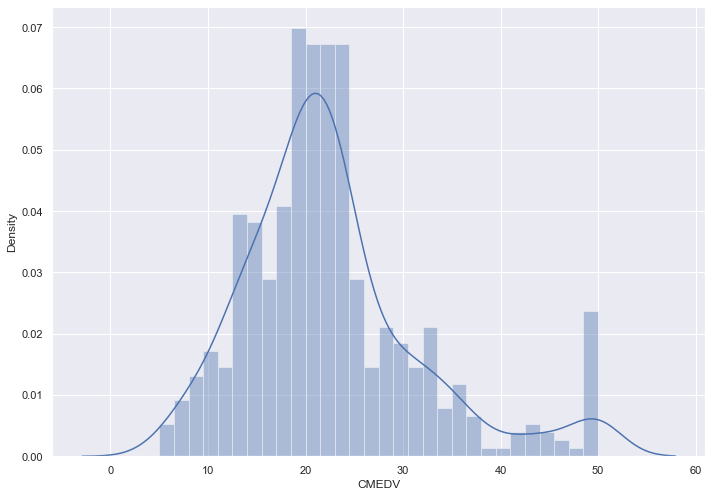

In [9]:
#Visualizamos el MEDV (corregido) en una gráfica

# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plot a histogram showing the distribution of the target values
sns.distplot(boston['CMEDV'], bins=30)
plt.show()

#observamos que, a pesar de ser los valores "corregidos" hay un pico o outlier en el 50

##### (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.<hr>

* We can firstly see that the CHAS data has close to no correlation with any other data, since every correlation is close to zero. This could be due to it's binary nature, since values take either 0 or 1, and no other predictor seems to have such behavior. Its strongest positive correlation is 0.18 with CMEDV and strongest negative correlation with PTRatio is -0.12, meaning CHAS could be a predictor considered for omission in this analysis.
* Another thing we found was that CRIM data has the strongest positive correlation with the RAD data, and has its strongest negative correlations with both the CMEDV data and B data.
* The B data has mostly negative or close to no correlation with other data except for CMEDV and DIS' data. Similarly, DIS data has a negative correlation with almost all the other data, except with the ZN, CMEDV, RM and B data.
* The RAD data and the TAX data have the strongest positive correlation (0.91) among predictors, almost reaching their own correlations of 1. Their correlation numbers are thus very close in the same situations. This can also be seen in their plots against the same other predictors, since they are very similar.
* On the other hand, DIS and NOX data have the strongest negative correlation (-0.77) among predictors in the data set.
* Furthermore, predictors which are plotted against the same common predictor, and have the negative and positive of more or so the same correlation number, may have fairly similar reflected plots. The biggest examples are AGE and DIS data's correlations; taking LSTAT, it can be seen since its correlation with AGE is 0.6 and its correlation with DIS is -0.5.
* Viewing the diagonal plots containing the intersection of predictors with themeselves, we can observe its data tendencies. As an example, CRIM's data seems to be mostly composed of low per capita crime values. INDUS, RAD, and TAX data seem to have polarized opposite values.
  
    
* There are some close inverse correlations between predictors compared to a same predictor, such as LSTAT and RM against CMEDV. As a result, their plots are similar reflections of one another. Nevertheless, their correlation values against the same predictors can vary a lot, since correlation between LSTAT and RM is -0.61, meaning they have a 61% probability of having their data behave like the inverse of one another.

In [10]:
#Creamos la matriz de correlacion
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

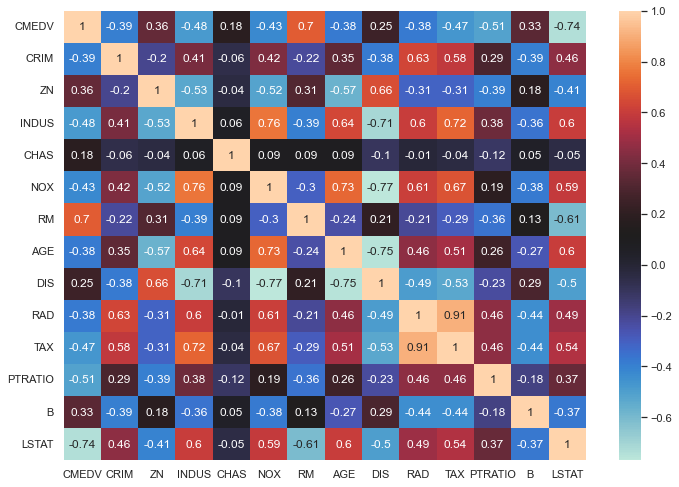

In [11]:
#Visualizamos nuestra matriz en un heatmap
#Valores rojos son cercanos a 1, azules cercanos a -1 y negros a 0
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(data=correlation_matrix, annot=True, cmap = "icefire")

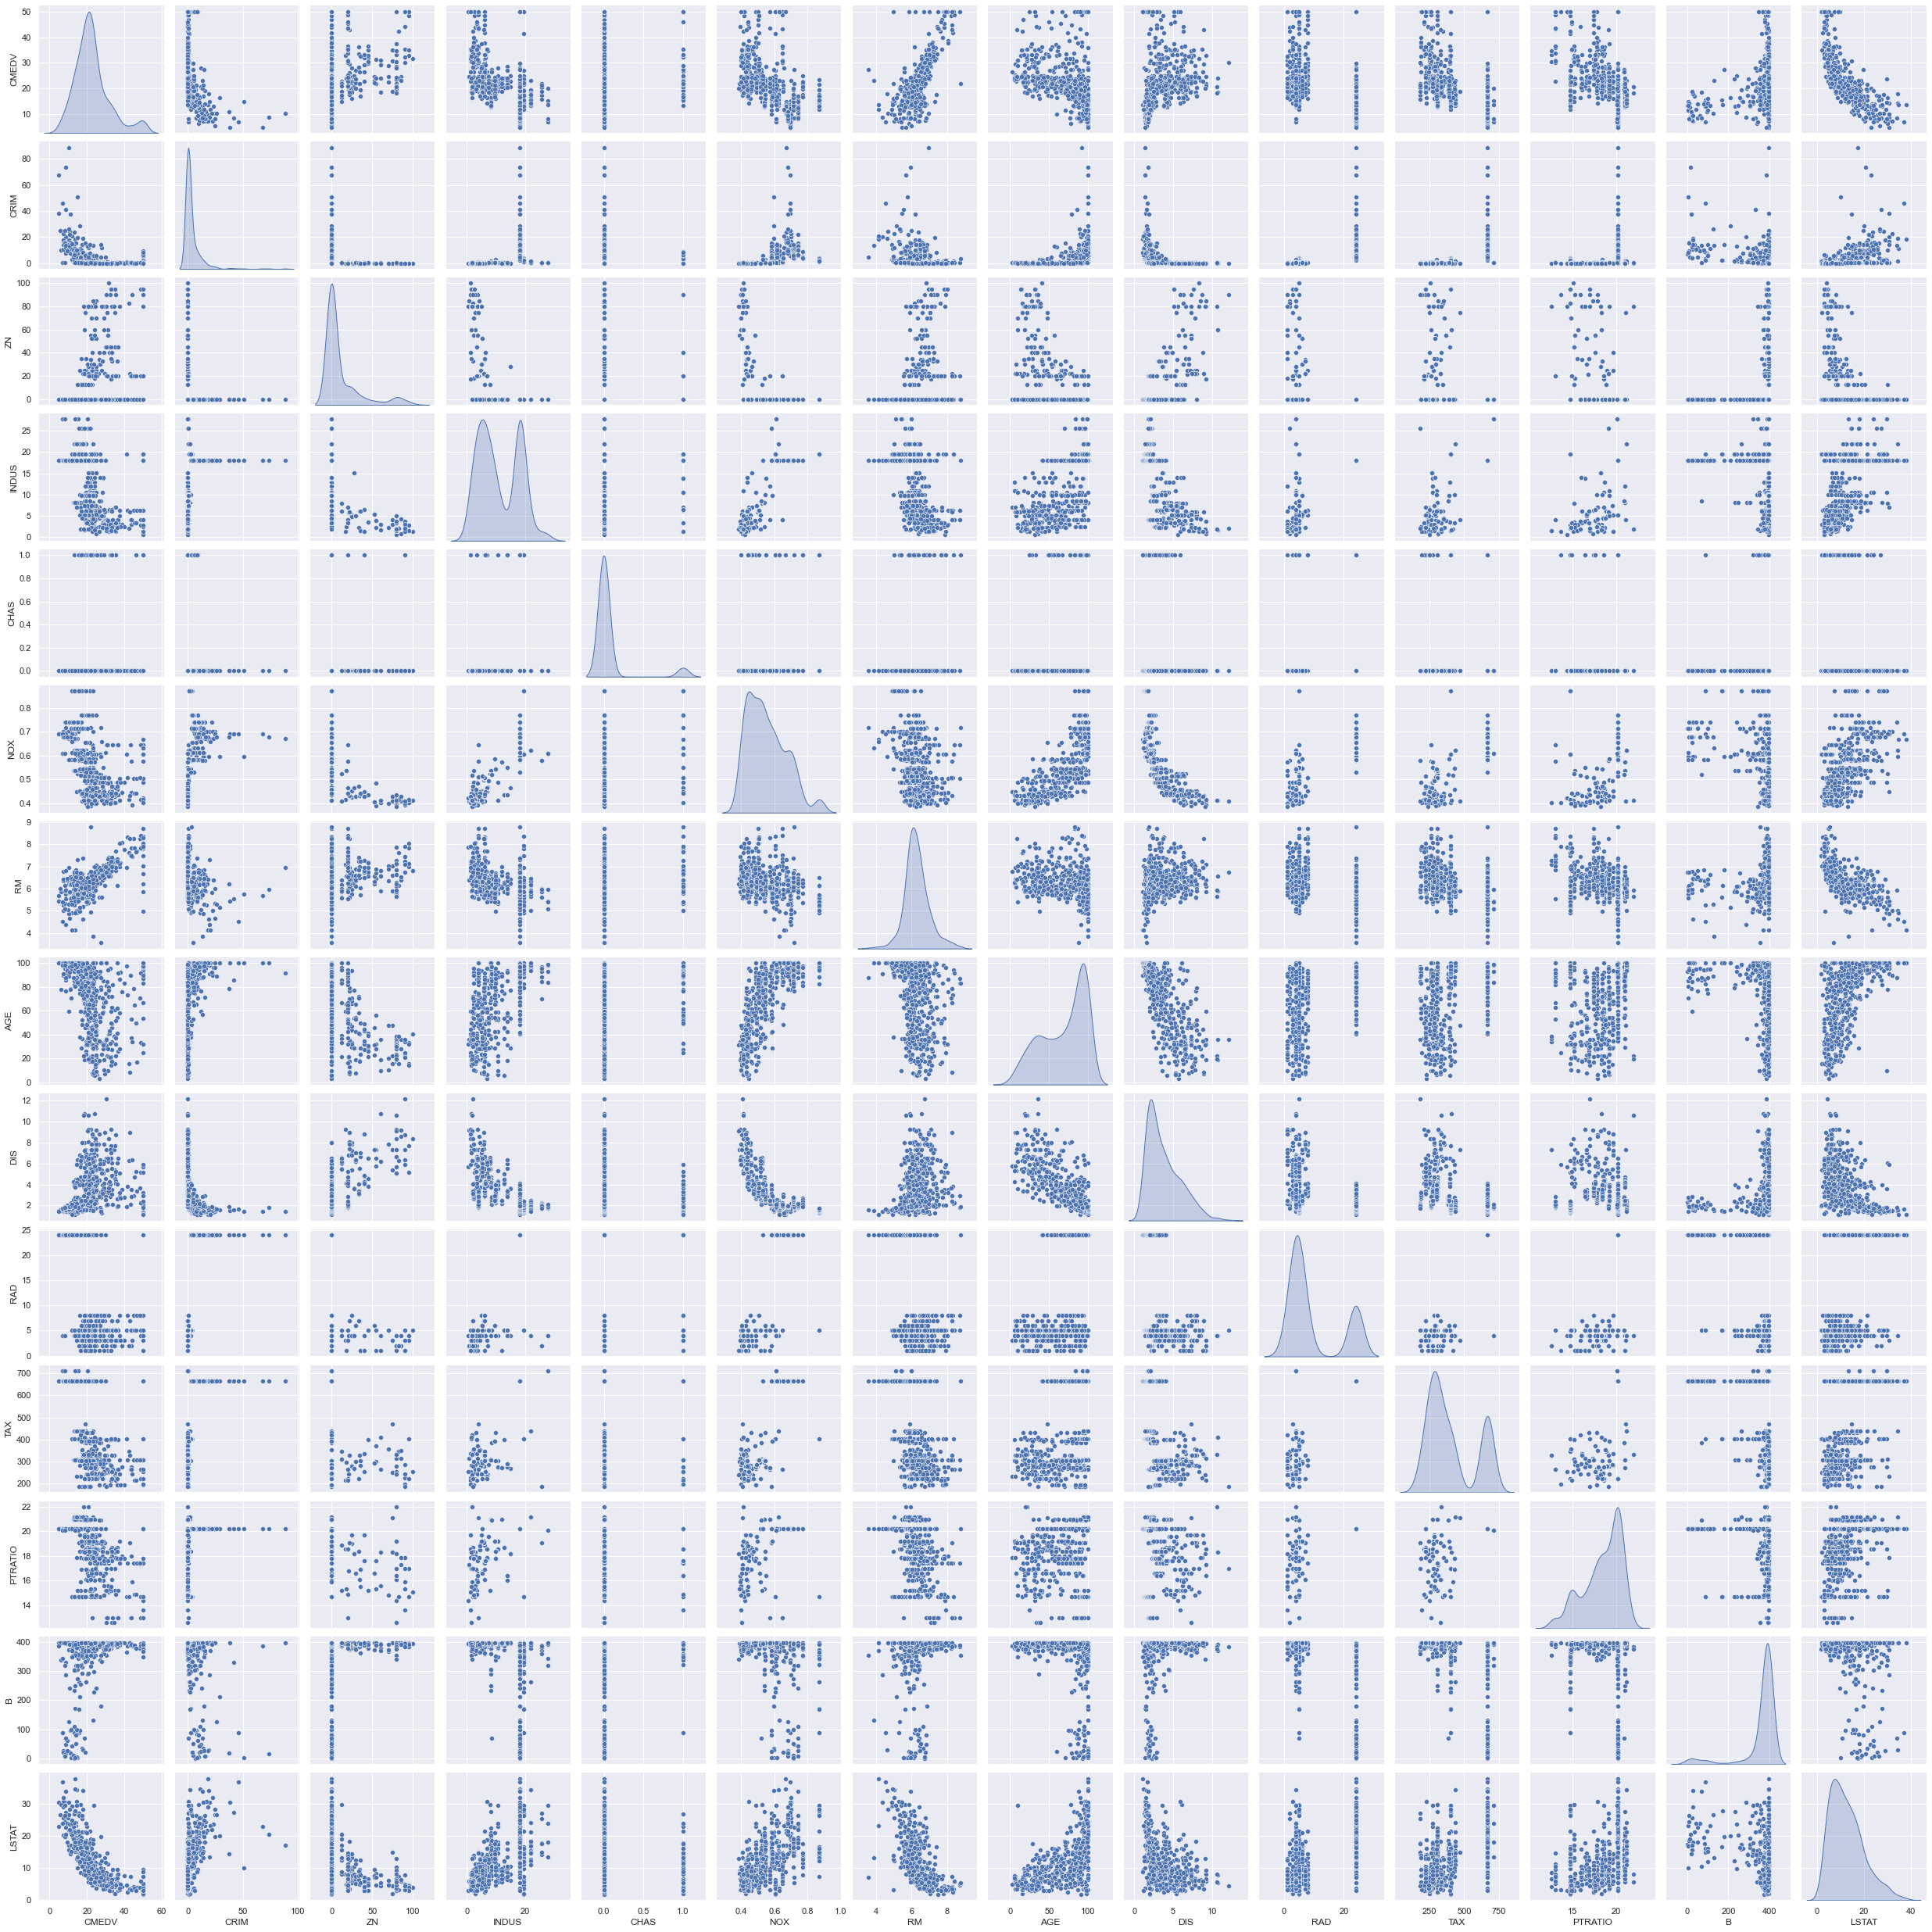

In [12]:
#Ahora observamos las gráficas de correlación entre pares de variables
sns.pairplot(boston, diag_kind = 'kde')

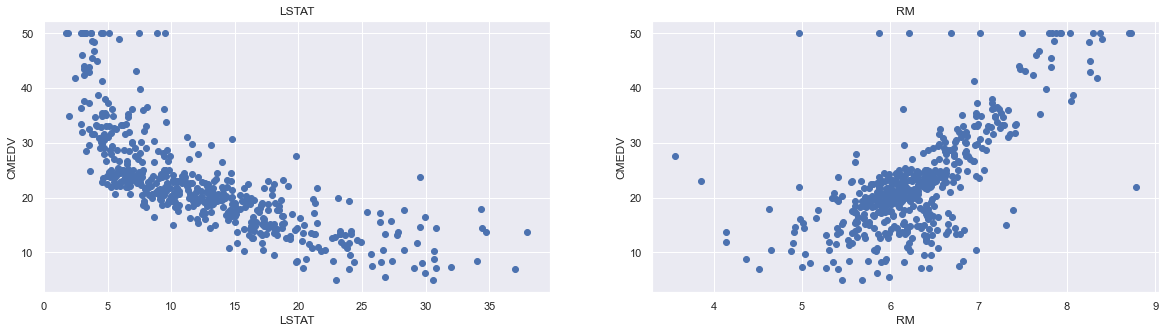

In [13]:
#Graficamos LSTAT y RM vs CMEDV

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['CMEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('CMEDV')

#LSTAT parece tener una relacion inversamente proporcional con CMEDV
#RM tiene una relacion directamente proporcional aunque con un gran número de outliers

##### (c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship. <hr>
The RAD data has the strongest positive correlation with per capita crime, we can see this in the correlational matrix with a 0.63. This means that when there is data with a higher index of accesibility to radial highways, there is a bigger probability that data of per capita crime rate will have higher values. As mentioned, RAD data has a strong relation with the TAX data, so it means TAX data has a similar relation with the per capita crime too (proven with a correlation value of 0.58, second strongest positive correlation with CRIM).   
LSTAT, NOX, and INDUS are the next strongest positive predictors, with similar correlation values; however, given they are lesser than 0.50, their relationship with per capita crime may be ambiguous and not clearly visible, yet can be considered.   
CMDEV, DIS, and B data are all the strongest negative correlations; however, since they are greater than -0.50, their relationship is similar to the past case.

##### (d) Suburbs with high predictors. Comment on the range of each predictor.<hr>
1. **Do any of the suburbs of Boston appear to have particularly high crime rates?**  
Yes, we can identify Boston Charlestown

In [14]:
boston['TOWN'].unique().shape

(92,)

In [15]:
boston.loc[boston['CRIM'].astype(float) > 3.6].groupby('TOWN').first().reset_index()[['TOWN', 'CRIM']]
#boston.loc[boston['CRIM'].astype(float) > 3.6][['TOWN', 'CRIM']]

,TOWN,CRIM
0,Boston Allston-Brighton,8.98296
1,Boston Back Bay,4.55587
2,Boston Beacon Hill,6.53876
3,Boston Charlestown,19.60910
4,Boston Dorchester,4.66883
5,Boston Downtown,20.71620
6,Boston East Boston,15.87440
7,Boston Forest Hills,4.64689
8,Boston Hyde Park,3.67367
9,Boston Mattapan,4.42228



2. **Tax rates?**  


In [16]:
boston.loc[boston['CRIM'].astype(float) > 87]['TOWN']

380    Boston Charlestown
Name: TOWN, dtype: object


3. **Pupil-teacher ratios?**  



##### (e) How many of the suburbs in this data set bound the Charles river? <hr>
11 suburbs

In [17]:
# Seleccionamos todos los cercanos al río (CHAS == 1), después se seleccionan los nombres únicos del TOWN
print(boston.loc[boston['CHAS'] == 1]['TOWN'].unique())
# Misma selección, pero con .shape para contar los TOWN resultantes
print(boston.loc[boston['CHAS'] == 1]['TOWN'].unique().shape)
#

['Cambridge' 'Waltham' 'Watertown' 'Newton' 'Dedham' 'Needham' 'Wellesley'
 'Dover' 'Boston Allston-Brighton' 'Boston Back Bay' 'Boston Beacon Hill']
(11,)


##### (f) What is the median pupil-teacher ratio among the towns in this data set? <hr>  
From the .describe() function, we can see that the median (50%) among the towns' pupil-teacher ratio is 19.05.

In [18]:
#Visualizamos resúmenes de predictores
boston.describe()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


##### (g) Suburbs with lowest CMEDV. Comment on your findings. <hr>
1. **Which suburb of Boston has lowest median value of owner occupied homes?**   
Boston South Boston

In [19]:
boston.loc[boston['CMEDV'].idxmin()]['TOWN']
# https://stackoverflow.com/a/61801746/13282304

'Boston South Boston'


2. **What are the values of the other predictors for that suburb, and how do those values compare 
to the overall ranges for those predictors?**  
* <u>CMDEV</u>: It can be seen CMDEV values are between the overall range [5,50], where most values fall in the lower 50% of the range values (less than 27.5 owner occupied housing) and even in the lower 25% (less than 16.25 owner occupied housing). Two values are equal to 5.0, the lowest median in the data set. These data indicate that South Boston's owner occupied housing in USD 1000 is relatively low in comparison to other Boston towns.  
* <u>CRIM</u>: All CRIM values for South Boston fall between the overall CRIM range [0.006320, 88.976200]. The highest data being 67.92 (only record above Boston's 50%), 41.52, and 38.35. Almost half the records are on the lower 25%, the rest located in the lower half of the range.  
* <u>ZN</u>: All values are 0, being the lowest possible value according to the data set range of [0,100].  
* <u>INDUS</u>: All values are 18.1, meaning South Boston's proportions of non-retail business acres per town is relatively high comparing to other Boston towns, since from the range [0.46, 27.74], South Boston is close to 20.92, which is where 25% of the highest proportions begin.  
* <u>CHAS</u>: The value is 0 in this binary predictor, meaning it is within the lower range of this predictor [0,1].
* <u>NOX</u>: All values are 0.693, which in comparison is above the 50% (0.628 nitric oxides concentration) of Boston town's values, but lower than its 75% (0.7495 nitric oxides concentration). Considering the range is [0.385, 0.871].
* <u>RM</u>:  
* <u>AGE</u>:  
* <u>DIS</u>:  
* <u>RAD</u>:  
* <u>TAX</u>:  
* <u>PTRATIO</u>:  
* <u>B</u>:  
* <u>LSTAT</u>:  

In [20]:
boston.loc[boston['TOWN'] == 'Boston South Boston']
# https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe

,TOWN,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
393,Boston South Boston,13.8,8.64476,0.0,18.1,0,0.693,6.193,92.6,1.7912,24,666,20.2,396.90,15.17
394,Boston South Boston,12.7,13.35980,0.0,18.1,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35
395,Boston South Boston,13.1,8.71675,0.0,18.1,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12
396,Boston South Boston,12.5,5.87205,0.0,18.1,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37
397,Boston South Boston,8.5,7.67202,0.0,18.1,0,0.693,5.747,98.9,1.6334,24,666,20.2,393.10,19.92
398,Boston South Boston,5.0,38.35180,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59
399,Boston South Boston,6.3,9.91655,0.0,18.1,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97
400,Boston South Boston,5.6,25.04610,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
401,Boston South Boston,7.2,14.23620,0.0,18.1,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
402,Boston South Boston,12.1,9.59571,0.0,18.1,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31


##### (h) Suburbs' RM<hr>
1. *In this data set, how many of the suburbs average more than seven rooms per dwelling?*  

2. *More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.*  


### 2.3 (Empirical) Dimension Reduction

##### (i) House value Prediction <hr>  
1. **Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value.** 

In [21]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['CMEDV']

In [22]:
from sklearn.model_selection import train_test_split

# Partimos los datos de training y test en 70% y 30%
# Asignamos un valor a random_state para asegurar que haya consistencia
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


## 3. Model Creation and training

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## Prediction of New Data

In [24]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.22667201712756
R2 score is 0.6556179513615119


The model performance for testing set
--------------------------------------
RMSE is 6.053705812807719
R2 score is 0.6157152870096305


**1. How well did the model perform? How can you improve these results?**  
We tested the prediction based on predictors LSTAT and RM, which have the strongest negative and positive correlations to CMDEV and are also similar but opposite numbers (-0.74 and 0.70). This model's R2 (Determination Coefficient), has a value of 0.65 for training set tests and 0.61 for the testing set, both values greater than 0.5 and lesser than 0.7, thus making the model's performance average. 
These results can be improved on by adding or changing the predictors which act as the x values and applying the same tests, as to compare R2 and get a higher value.

## Visualization of Results

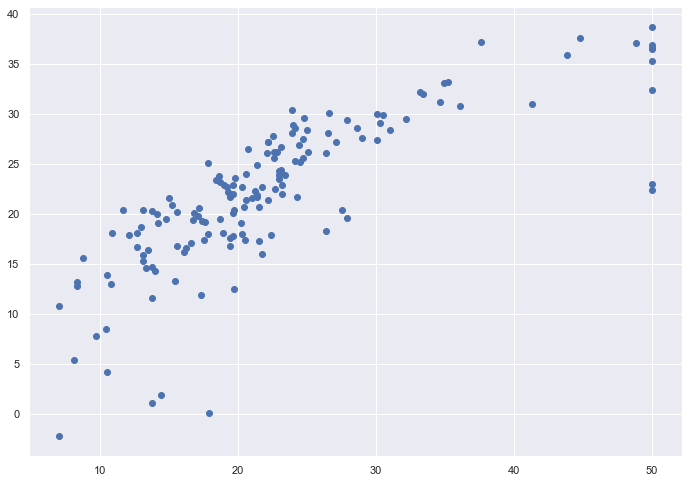

In [25]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

#### (j) Per Capita Crime Simple Regression Model<hr>
1. **We will now try to predict per capita crime rate using the other variables in this data set. In 
other words, per capita crime rate is the response, and the other variables are the predictors. 
For each predictor, individually, fit a simple linear regression model to predict the response. 
Describe your results.**   
  d  
  
2. **In which of the models is there a statistically significant association 
between the predictor and the response? Create some plots to back up your assertions.**  
d

##### 2.3.1 Dimension Reduction for Simple Regression Model

In [27]:
# Dividimos el dataframe en cada predictor, para definir las X de nuestro modelo
X_CMEDV = pd.DataFrame(np.c_[boston['CMEDV']], columns = ['CMEDV'])
X_ZN = pd.DataFrame(np.c_[boston['ZN']], columns = ['ZN'])
X_INDUS = pd.DataFrame(np.c_[boston['INDUS']], columns = ['INDUS'])
X_CHAS = pd.DataFrame(np.c_[boston['CHAS']], columns = ['CHAS'])
X_NOX = pd.DataFrame(np.c_[boston['NOX']], columns = ['NOX'])
X_RM = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])
X_AGE = pd.DataFrame(np.c_[boston['AGE']], columns = ['AGE'])
X_DIS = pd.DataFrame(np.c_[boston['DIS']], columns = ['DIS'])
X_RAD = pd.DataFrame(np.c_[boston['RAD']], columns = ['RAD'])
X_TAX = pd.DataFrame(np.c_[boston['TAX']], columns = ['TAX'])
X_PTRATIO = pd.DataFrame(np.c_[boston['PTRATIO']], columns = ['PTRATIO'])
X_B = pd.DataFrame(np.c_[boston['B']], columns = ['B'])
X_LSTAT = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
# Definimos CRIM como nuestra Y
Y_CRIM = boston['CRIM']

##### 2.4.1 Data Partitions for Simple Regression Model

In [28]:
# Partimos los datos de training y test en 70% y 30%
# Asignamos un valor a random_state para asegurar que haya consistencia
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_CMEDV, Y_CRIM, test_size = 0.3, random_state=5)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_ZN, Y_CRIM, test_size = 0.3, random_state=5)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_INDUS, Y_CRIM, test_size = 0.3, random_state=5)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_CHAS, Y_CRIM, test_size = 0.3, random_state=5)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_NOX, Y_CRIM, test_size = 0.3, random_state=5)
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X_RM, Y_CRIM, test_size = 0.3, random_state=5)
X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X_AGE, Y_CRIM, test_size = 0.3, random_state=5)
X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X_DIS, Y_CRIM, test_size = 0.3, random_state=5)
X_train9, X_test9, Y_train9, Y_test9 = train_test_split(X_RAD, Y_CRIM, test_size = 0.3, random_state=5)
X_train10, X_test10, Y_train10, Y_test10 = train_test_split(X_TAX, Y_CRIM, test_size = 0.3, random_state=5)
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X_PTRATIO, Y_CRIM, test_size = 0.3, random_state=5)
X_train12, X_test12, Y_train12, Y_test12 = train_test_split(X_B, Y_CRIM, test_size = 0.3, random_state=5)
X_train13, X_test13, Y_train13, Y_test13 = train_test_split(X_LSTAT, Y_CRIM, test_size = 0.3, random_state=5)

##### 3.1 Simple Regression Model Creation

In [29]:
lin_model = LinearRegression()

##### 4.1 Training and 5.1 Testing

In [30]:
# Para simplificar el proceso se crea una función que incluye training y testing
def trainingTesting(X_train, X_test, Y_train, Y_test):
    #model training
    lin_model.fit(X_train, Y_train)
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)

    # R2 and MSE calulations
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # root mean square error of the model
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    # r-squared score of the model
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print()

In [31]:
#CMDEV
print("CMDEV")
trainingTesting(X_train1, X_test1, Y_train1, Y_test1)
# ZN
print("ZN")
trainingTesting(X_train2, X_test2, Y_train2, Y_test2) 
# INDUS
print("INDUS")
trainingTesting(X_train3, X_test3, Y_train3, Y_test3) 
# CHAS 
print("CHAS")
trainingTesting(X_train4, X_test4, Y_train4, Y_test4) 
# NOX
print("NOX")
trainingTesting(X_train5, X_test5, Y_train5, Y_test5) 
# RM
print("RM")
trainingTesting(X_train6, X_test6, Y_train6, Y_test6) 
# AGE
print("AGE")
trainingTesting(X_train7, X_test7, Y_train7, Y_test7) 
# DIS
print("DIS")
trainingTesting(X_train8, X_test8, Y_train8, Y_test8) 
# RAD
print("RAD")
trainingTesting(X_train9, X_test9, Y_train9, Y_test9) 
# TAX
print("TAX")
trainingTesting(X_train10, X_test10, Y_train10, Y_test10) 
# PTRATIO
print("PTRATIO")
trainingTesting(X_train11, X_test11, Y_train11, Y_test11) 
# B
print("B")
trainingTesting(X_train12, X_test12, Y_train12, Y_test12) 
# LSTAT
print("LSTAT")
trainingTesting(X_train13, X_test13, Y_train13, Y_test13)

CMDEV
The model performance for training set
--------------------------------------
RMSE is 7.473108811027102
R2 score is 0.17834011151483453


The model performance for testing set
--------------------------------------
RMSE is 8.871206191906479
R2 score is 0.09870403720297083

ZN
The model performance for training set
--------------------------------------
RMSE is 8.071065536780937
R2 score is 0.04159025206942912


The model performance for testing set
--------------------------------------
RMSE is 9.181604086546495
R2 score is 0.03452906880639406

INDUS
The model performance for training set
--------------------------------------
RMSE is 7.462976774032952
R2 score is 0.1805666132350392


The model performance for testing set
--------------------------------------
RMSE is 8.68849404556648
R2 score is 0.1354480510140217

CHAS
The model performance for training set
--------------------------------------
RMSE is 8.232656200820017
R2 score is 0.002829473246826364


The model performance 

##### (k) CRIM Multiple Regression Model<hr>
1. **Fit a multiple regression model to predict the response using all the predictors. Describe your results.**  

2. **For which predictors can we get the best results?**  

3. **Which predictors can be eliminated?**  


##### 2.3.2 Dimension Reduction for Multiple Regression

In [32]:
X_All = boston.drop(['CRIM', 'TOWN'], axis=1)
X_RAD_TAX = pd.DataFrame(np.c_[boston['RAD'], boston['TAX']], columns = ['RAD','TAX'])
X_All_CMEDV_B_DIS_RM_ZN = boston.drop(['CRIM', 'TOWN', 'CMEDV', 'B', 'DIS','ZN'], axis=1)
Y_Crim = boston['CRIM']

##### 2.4.2 Data partition for Multiple Regression

In [33]:
from sklearn.model_selection import train_test_split

# Partimos los datos de training y test en 70% y 30%
# Asignamos un valor a random_state para asegurar que haya consistencia
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_All, Y_Crim, test_size = 0.3, random_state=5)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_RAD_TAX, Y_Crim, test_size = 0.3, random_state=5)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_All_CMEDV_B_DIS_RM_ZN, Y_Crim, test_size = 0.3, random_state=5)

## 3.2 Model Creation for Multiple Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 4.2 Training for Multiple Regression

In [35]:
lin_model = LinearRegression()
lin_model2 = LinearRegression()
lin_model3 = LinearRegression()
lin_model.fit(X_train1, Y_train1)
lin_model2.fit(X_train2, Y_train2)
lin_model3.fit(X_train3, Y_train3)

LinearRegression()

## 5.2 Prediction of New Data for Multiple Regression

In [36]:
# model evaluation for training set

y_train_predict1 = lin_model.predict(X_train1)
rmse = (np.sqrt(mean_squared_error(Y_train1, y_train_predict1)))
r2 = r2_score(Y_train1, y_train_predict1)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict1 = lin_model.predict(X_test1)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test1, y_test_predict1)))

# r-squared score of the model
r2 = r2_score(Y_test1, y_test_predict1)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


print("--------------------------------------")

y_train_predict2 = lin_model2.predict(X_train2)
rmse = (np.sqrt(mean_squared_error(Y_train2, y_train_predict2)))
r2 = r2_score(Y_train2, y_train_predict2)

print("The model 2 performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict2 = lin_model2.predict(X_test2)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test2, y_test_predict2)))

# r-squared score of the model
r2 = r2_score(Y_test2, y_test_predict2)

print("The model 2 performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))



The model performance for training set
--------------------------------------
RMSE is 6.051565593438625
R2 score is 0.46120325336250445


The model performance for testing set
--------------------------------------
RMSE is 7.447404845932344
R2 score is 0.36479778391383133
--------------------------------------
The model 2 performance for training set
--------------------------------------
RMSE is 6.4501408204279524
R2 score is 0.38789226533126864


The model 2 performance for testing set
--------------------------------------
RMSE is 7.267025504559834
R2 score is 0.39519489628645277


In [37]:
print("--------------------------------------")

y_train_predict3 = lin_model3.predict(X_train3)
rmse = (np.sqrt(mean_squared_error(Y_train3, y_train_predict3)))
r2 = r2_score(Y_train3, y_train_predict3)

print("The model 3 performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict3 = lin_model3.predict(X_test3)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test3, y_test_predict3)))

# r-squared score of the model
r2 = r2_score(Y_test3, y_test_predict3)

print("The model 3 performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

--------------------------------------
The model 3 performance for training set
--------------------------------------
RMSE is 6.260467565196095
R2 score is 0.4233623243217215


The model 3 performance for testing set
--------------------------------------
RMSE is 7.118782054241412
R2 score is 0.4196186178021635


##### (l) How do your results from (j) compare to your results from (k)? <hr>  



(a) 
How many rows are in this data set?
    506 rows of data
How many columns?
    14 columns, 13 are from the data_set and the other column is just an id
What do the rows and columns represent?
    The rows represent each town in boston
    The columns represent a data category being measured
(b) 
Make some pairwise scatterplots of the predictors (columns) in this data set.  
Describe your findings.

Some of the findings we found, are that the CRIM have a strong correlation with the RAD data and the most negative correlation with the CRIM are the CMEDV data and B data.
Another thing we can see is that the CHAS data have no correlation with the other data
The RAD data and the TAX data have a strong correlation, almost the same correlation of themselves

 
 
(c) 
Are any of the predictors associated with per capita crime rate? 
If so, explain the relationship. 
 
(d) 
Do any of the suburbs of Boston appear to have particularly high crime rates?  
Tax rates? Pupil-teacher ratios? Comment on the range of each predictor. 
 
(e) 
How many of the suburbs in this data set bound the Charles river? 
 
(f) 
What is the median pupil-teacher ratio among the towns in this data set? 
 
(g) 
Which suburb of Boston has lowest median value of owner occupied homes?  
What are the values of the other predictors for that suburb, and how do those values compare 
to the overall ranges for those predictors? Comment on your findings. 
 
(h) 
In this data set, how many of the suburbs average more than seven rooms per dwelling?  
More than eight rooms per dwelling? 
Comment on the suburbs that average more than eight rooms per dwelling. 
 
(i) 
Split the data in training (70%) and test (30%) data, use the linear regression model with the 
training data, and test it to predict House value.  
How well did the model perform? How can you improve these results? 
 
(j) 
We will now try to predict per capita crime rate using the other variables in this data set. In 
other words, per capita crime rate is the response, and the other variables are the predictors. 
For each predictor, individually, fit a simple linear regression model to predict the response. 
Describe your results. In which of the models is there a statistically significant association 
between the predictor and the response? Create some plots to back up your assertions. 
 
(k) 
Fit a multiple regression model to predict the response using all the predictors.  
Describe your results.  
For which predictors can we get the best results? 
Which predictors can be eliminated? 
 
(l) 
How do your results from (j) compare to your results from (k)? 